# K Means

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd
import re
sns.set_style("white")

In [2]:
df = pd.read_csv('../experiments/models.csv')
df = df.replace(r'\n',' ', regex=True) 
df['feature'] = df['feature'].map(lambda x: x.lstrip('[]').rstrip('aAbBcC'))

In [3]:
# Replace '|' in cells with series.str methods
for col in df:
    if df[col].dtype == 'object':
        df[col] = df[col].str.replace(']', '')

In [4]:
df.head(3)

,feature,acc
0,'numberOfFixesUntil:',0.623314
1,'linesAddedUntil:',0.715443
2,'linesRemovedUntil:',0.684659


In [5]:
x = pd.read_csv('../experiments/accvar.csv')

In [6]:
x.head()

,feature,acc,mad
0,numberOfFixesUntil:,0.849044,0.018968
1,linesAddedUntil:,0.861745,0.013857
2,linesRemovedUntil:,0.854458,0.015484
3,maxLinesRemovedUntil:,0.857912,0.018372
4,codeChurnUntil:,0.860802,0.016148


In [7]:
features=df['feature'].tolist()
feat=x['feature'].tolist()
accs=x['acc'].tolist()
var=x['mad'].tolist()

In [8]:
f2 = []

for x in features:
    y = x.replace("'", "")
    f2.append(y)

In [9]:
def define_var(features, feat, accs):

    sum = 0
    count = 0
    results = []

    for i in features:
        i = i.replace(" ", "")
        each_feature = i.split(",")
        sum = 0
        count = 0
        for j in each_feature:
            j = j.replace(" ", "")
            new_j = re.sub('[^a-zA-Z0-9 \n\.]', '', j)
            for f, acc in zip(feat, accs):
                new_f = re.sub('[^a-zA-Z0-9 \n\.]', '', f)
                new_f = new_f.replace(" ", "")
                if new_f == new_j:
                    sum = sum + acc
                    count = count + 1

        results.append(sum/count)
            
    return results

In [10]:
rr = define_var(f2, feat, var)
#rr2 = define_var(f2, feat, accs)

In [11]:
df.shape

(6377, 2)

In [12]:
df['var'] = rr

In [13]:
df.head(20)

,feature,acc,var
0,'numberOfFixesUntil:',0.623314,0.018968
1,'linesAddedUntil:',0.715443,0.013857
2,'linesRemovedUntil:',0.684659,0.015484
3,'maxLinesRemovedUntil:',0.683040,0.018372
4,'codeChurnUntil:',0.696981,0.016148
5,'ageWithRespectTo:',0.685788,0.012105
6,'weightedAgeWithRespectTo:',0.556560,0.021013
7,'CvsEntropy',0.705792,0.017396
8,'CvsWEntropy',0.725067,0.013969
9,'CvsLogEntropy',0.704131,0.013102


In [149]:
results = df.acc.values
df = df.drop('acc', axis=1)
df['acc'] = results 

In [151]:
df.to_csv('../experiments/data-processed.csv', index = False, header=True)

In [14]:
df2 = df['feature'].str.get_dummies(sep=',')

In [15]:
df2['acc'] = df['acc']

In [16]:
df2.head()

,'CvsEntropy','CvsEntropy','CvsExpEntropy','CvsExpEntropy','CvsLogEntropy','CvsLogEntropy','CvsWEntropy','CvsWEntropy','ageWithRespectTo:','ageWithRespectTo:',...,'numberOfFixesUntil:','numberOfFixesUntil:','numberOfMethodsInherited','numberOfMethodsInherited','numberOfPrivateMethods','numberOfPrivateMethods','rfc','weightedAgeWithRespectTo:','weightedAgeWithRespectTo:',acc
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0.623314
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.715443
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.684659
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.683040
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.696981


In [176]:
df2.to_csv('../experiments/data-processed.csv', index = False, header=True)

In [133]:
x = df2.values

In [134]:

#df['mad'] = df.mad(axis=1)

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.62331417],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.71544274],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.68465891],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.76374498],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.75464979],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.79425829]])

In [135]:
kmeans5 = KMeans(n_clusters=5)
y_kmeans5 = kmeans5.fit_predict(x)
y_kmeans5

array([2, 2, 2, ..., 0, 2, 2], dtype=int32)

In [136]:
kmeans5.cluster_centers_

array([[ 1.06566200e-01, -1.28369537e-16,  1.30247578e-01,
        -2.01227923e-16,  1.17330463e-01,  2.63677968e-16,
         1.06566200e-01,  1.71737624e-16,  8.07319699e-02,
        -6.33174069e-17,  1.35629709e-01, -3.05311332e-16,
         6.13562971e-02, -1.51788304e-17,  1.47470398e-01,
         8.04911693e-16,  1.49623251e-01, -2.84494650e-16,
         1.55005382e-01, -6.66133815e-16,  1.07642626e-03,
        -3.16587034e-17,  1.93756728e-02,  6.50521303e-18,
         4.62863294e-02, -1.23599048e-17,  1.59311087e-01,
         9.57567359e-16,  1.68998924e-01,  2.41473508e-15,
         5.38213132e-03,  7.58941521e-18,  1.65769645e-01,
         2.44249065e-15,  8.32667268e-17,  1.00000000e+00,
         4.30570506e-03,  2.74780199e-15,  8.93433800e-02,
         8.58688121e-17,  6.02798708e-02, -1.68051337e-18,
         3.12163617e-02, -1.68051337e-18,  3.98277718e-02,
        -1.68051337e-18,  6.24327234e-02, -1.68051337e-18,
         8.50376749e-02, -1.68051337e-18,  2.36813778e-0

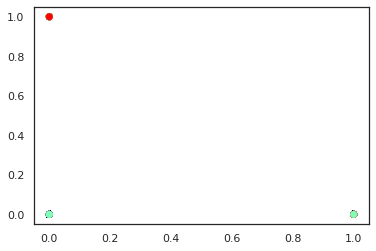

In [137]:
plt.scatter(x[:,0], x[:,1], c=y_kmeans5, cmap='rainbow')

In [95]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

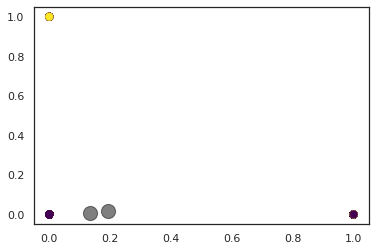

In [96]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

###### That's all folks!!!